In [15]:
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt

from molnet.data import input_pipeline_online
from molnet.models import create_model

from configs.tests import attention_test
from configs import root_dirs

In [8]:
config = attention_test.get_config()
config.root_dir = root_dirs.get_root_dir()

In [17]:
ds = input_pipeline_online.get_datasets(config)['train']
rng = jax.random.PRNGKey(0)
init_rng, rng = jax.random.split(rng)

model = create_model(config.model)
dummy_input = jnp.empty((1, 128, 128, int(config.z_cutoff/0.1), 1))
variables = model.init(init_rng, dummy_input, training=False)
params = variables["params"]
batch_stats = variables["batch_stats"]

[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 8541915143570342263


In [20]:
batch = next(ds)

y = model.apply(
    {"params": params, "batch_stats": batch_stats},
    batch['images'],
    training=False,
)

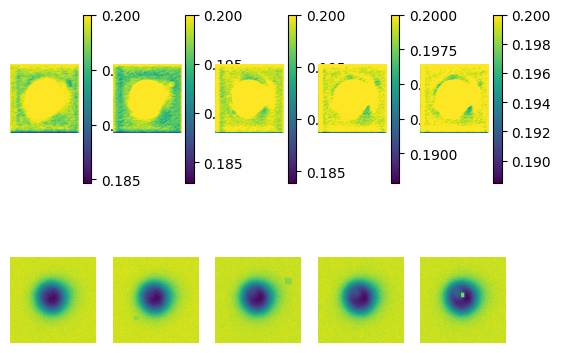

In [25]:
for i in range(5):
    ax = plt.subplot(2, 5, i+1)
    im = ax.imshow(y[0, ..., i, 0])
    plt.colorbar(im)
    ax.axis('off')

    ax = plt.subplot(2, 5, i+6)
    ax.imshow(batch['images'][0, ..., i, 0])
    ax.axis('off')